## **BizCardX: Extracting Business Card Data with OCR**

**INSTALL THE REQUIRED PACKAGES AND IMPORT REQUIRED LIBRARIES**

In [ ]:
!pip install easyocr

In [ ]:
!pip install opencv-python
!pip install pytesseract

In [ ]:
import cv2
import PIL
import easyocr
import pytesseract
import re
import matplotlib.pyplot as plt

File_path = "/content/5.png"
img = cv2.imread(File_path, -1)

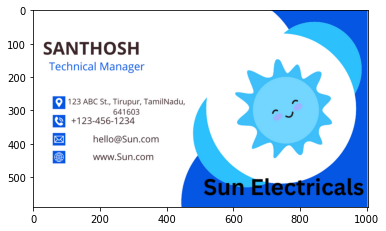

In [ ]:
plt.imshow(img)

### **PROCESS IMAGE IF REQUIRED FOR PROPER DATA EXTRACT**

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (5, 5), 0)
#_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


### **USING easyOCR FOR READING DATA**

In [ ]:
reader = easyocr.Reader(['en'])
results = reader.readtext(gray)

In [ ]:
for result in results:
    print(result[1])

SANTHOSH
Technical Manager
123 ABC St , Tirupur, TamilNadu;
641603
+123-456-1234
hello@Sun.com
www.Suncom
Sun Electricals


## **USING REGEX FOR EXTRACTING IN PROPER FORMAT**




In [ ]:
name_regex = r"(?P<first_name>\w+)"
position_regex = r"(?P<position>[a-zA-Z ]+)"
address_regex = r"(?P<address>[0-9a-zA-Z #,-]+) , (?P<city>[a-zA-Z ]+), \s*(?P<state>[a-zA-Z]+);"
pin_regex   = r"(?P<zip>\d{6})"
phone_regex = r"(?P<phone>\+?\d{1,3}[- ]?\d{3}[- ]?\d{4})"
email_regex = r"(?P<email>[\w\.-]+@[\w\.-]+)"
website_regex = r"(?P<website>www\.[\w\.]+)"
company_regex = r"(?P<company>[a-zA-Z ]+)"


# Define a function to extract a specific piece of information using a regular expression
def extract_info(text, regex):
    match = re.search(regex, text)
    if match:
        return match.group(0)
    else:
        return None

# Extract all relevant sections from the text and store them in a dictionary
info = {}
for result in results:
    text = result[1]
    if not text:
        continue
    text_lst = text.splitlines()
    text_lst = [word for word in text_lst if len(word) != 0]
    for line in text_lst:
        
        if not info.get("name"):
            name_match = re.match(name_regex, line)
            if name_match:
                info["name"] = line
                continue
        
        if not info.get("position_name"):
            pos_match = re.match(position_regex, line)
            if pos_match:
                info["position_name"] = line
                continue 
        
        if not info.get("address"):
            address_match = re.match(address_regex, line)
            if address_match:
                info["address"] = line
                continue
        
        if not info.get("pincode"):
            pin_match = re.match(pin_regex, line)
            if pin_match:
                info["pincode"] = line
                continue
        
        if not info.get("phone"):
            phone_match = re.search(phone_regex, line)
            if phone_match:
                info["phone"] = phone_match.group("phone")
                continue
        
        if not info.get("email"):
            email_match = re.search(email_regex, line)
            if email_match:
                info["email"] = email_match.group("email")
                continue
        
        if not info.get("website"):
            website_match = re.search(website_regex, line)
            if website_match:
                info["website"] = website_match.group("website")
                continue
        
        if not info.get("company_name"):
            company_match = re.match(company_regex, line)
            if company_match:
                info["company_name"] = line
                continue       

# Print the extracted information
print(info)

{'name': 'SANTHOSH', 'position_name': 'Technical Manager', 'address': '123 ABC St , Tirupur, TamilNadu;', 'pincode': '641603', 'phone': '+123-456-1234', 'email': 'hello@Sun.com', 'website': 'www.Suncom', 'company_name': 'Sun Electricals'}


In [ ]:
info['address'] = '123 ABC St , Tirupur, TamilNadu.'
info['website'] = 'www.Sun.com'


### **STORING THE EXTRACTED DATA IN TABLE**

In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('card_info.db')
c = conn.cursor()

# Create a table to store the card information
c.execute('''CREATE TABLE IF NOT EXISTS business_card
             (name TEXT,
              position TEXT,
              address TEXT,
              pincode TEXT,
              phone TEXT,
              email TEXT,
              website TEXT,
              company TEXT
              )''')

# Insert the extracted card information into the database
sql = 'INSERT INTO business_card (name, position, address, pincode, phone, email, website, company) VALUES (?, ?, ?, ?, ?, ?, ?, ?)'

# Execute the query with the data from the dictionary
c.execute(sql, (info['name'], info['position_name'], info['address'], info['pincode'], info['phone'], info['email'], info['website'], info['company_name']))

# Commit the changes and close the connection
conn.commit()



In [ ]:
#show the data in the table
x = c.execute("SELECT * FROM business_card")
x_data = c.fetchall()
for row in x_data:
    print(row)

('SANTHOSH', 'Technical Manager', '123 ABC St , Tirupur, TamilNadu.', '641603', '+123-456-1234', 'hello@Sun.com', 'www.Sun.com', 'Sun Electricals')


### **FURTHER FOR STREAMLIT GUI AND DISPLAY DATA**

In [ ]:
!pip install streamlit

In [ ]:
!./ngrok authtokens 2Lb7nKJVe0k542wdclYWapnyfux_4nJurZjAiNAWGPRshYfda

In [ ]:
!pip install pyngrok
from pyngrok import ngrok 
public_p_url = ngrok.connect(port='8501')

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import sqlite3

# Set the title and page icon
st.set_page_config(page_title="BIZCARD-X", page_icon=":credit_card:")

st.title(":blue[Here Comes The Data!!!:star:]")

# Set the sidebar title and image
st.sidebar.title("Business Card Extraction")
st.sidebar.image("5.png", width=250)

# Connect to the database
conn = sqlite3.connect('card_info.db')
c = conn.cursor()

# Define a function to retrieve and display the data
def display_data():
    # Retrieve the data from the database
    c.execute("SELECT * FROM business_card")
    data = c.fetchall()

    # Display the data in text boxes
    for item in data:
        st.text_input('Name:', item[0])
        st.text_input('Position:', item[1])
        st.text_input('Address:', item[2])
        st.text_input('Pincode:', item[3])
        st.text_input('Phone:', item[4])
        st.text_input('Email:', item[5])
        st.text_input('Website:', item[6])
        st.text_input('Company:', item[7])

# Display the button to trigger the display of the data
if st.sidebar.button('Extract And Show'):
    display_data()







Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel -p 8501

npx: installed 22 in 2.519s


your url is: https://sweet-months-stop-34-82-127-161.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.127.161:8501

  Stopping...
^C
